### The following is the application of GANs in weather prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
#download the weather images and put them in a directory
path = r'C:\Users\kshifera\Desktop\CF_Course\Specialization\Project\Data Sets\WeatherConditions\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [6]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 50, 
    steps_per_epoch = train_generator.n // train_generator.batch_size - 1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size - 1,
)
train_generator.n // train_generator.batch_size - 1

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6690 - loss: 0.1069 - val_accuracy: 0.8021 - val_loss: 0.0757
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8125 - loss: 0.0711 - val_accuracy: 0.7812 - val_loss: 0.0801
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 957ms/step - accuracy: 0.7922 - loss: 0.0825 - val_accuracy: 0.8177 - val_loss: 0.0712
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8588 - loss: 0.0642 - val_accuracy: 0.7188 - val_loss: 0.0764
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8394 - loss: 0.0619 - val_accuracy: 0.5990 - val_loss: 0.1506
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6729 - loss: 0.1089 - val_accuracy: 0.6562 - val_loss: 0.1407
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 971ms/step - accuracy: 0.7649 - loss: 0.0867 - val_accuracy: 0.8021 - val_loss: 0.0799
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8299 - loss: 0.0525 - val_accuracy: 0.8125 -

27

In [7]:
results = pd.DataFrame(model.history.history)

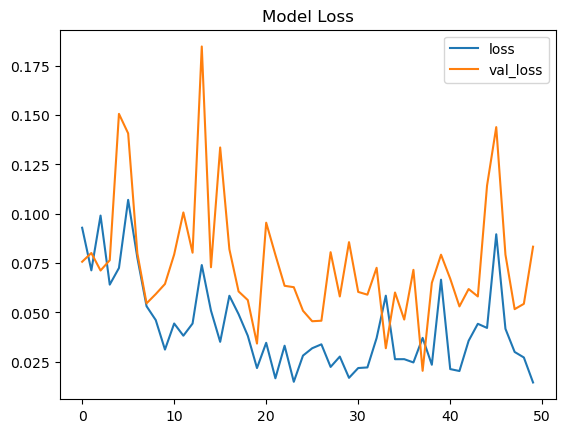

In [8]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

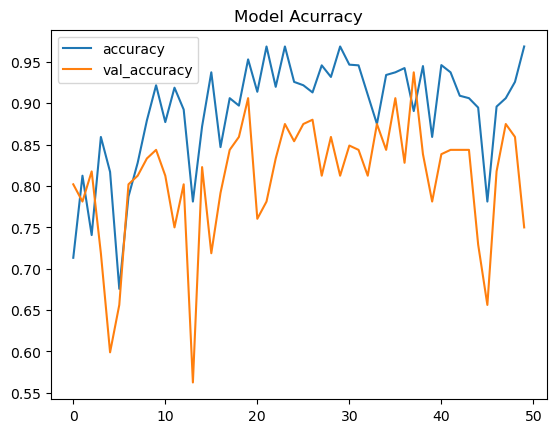

In [9]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [10]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.96875, Val_Accuracy: 0.75
Loss: 0.014485923573374748, Val_Loss: 0.08330079913139343


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step


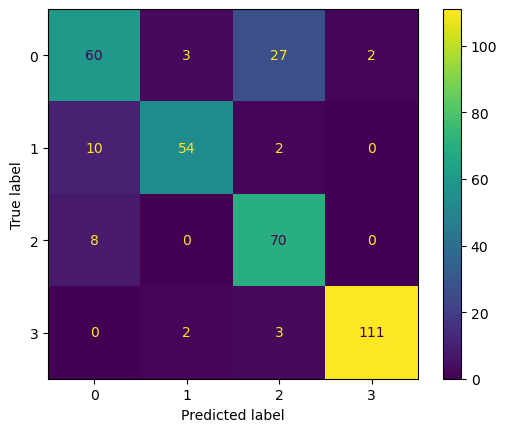

In [11]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [14]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


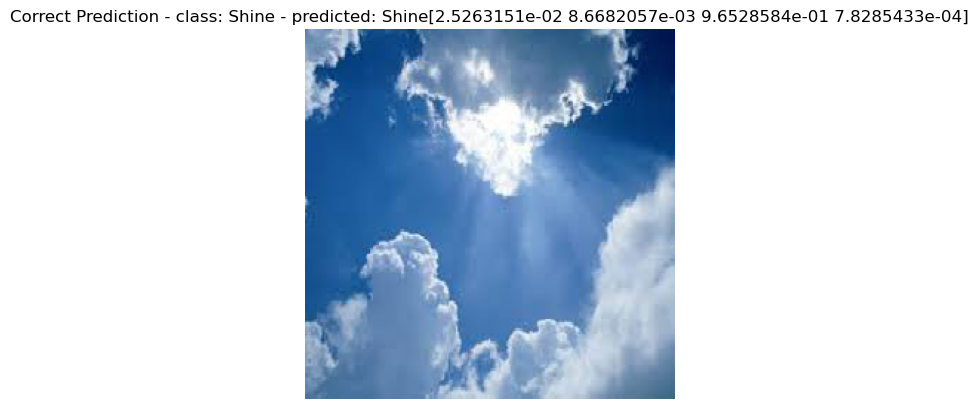

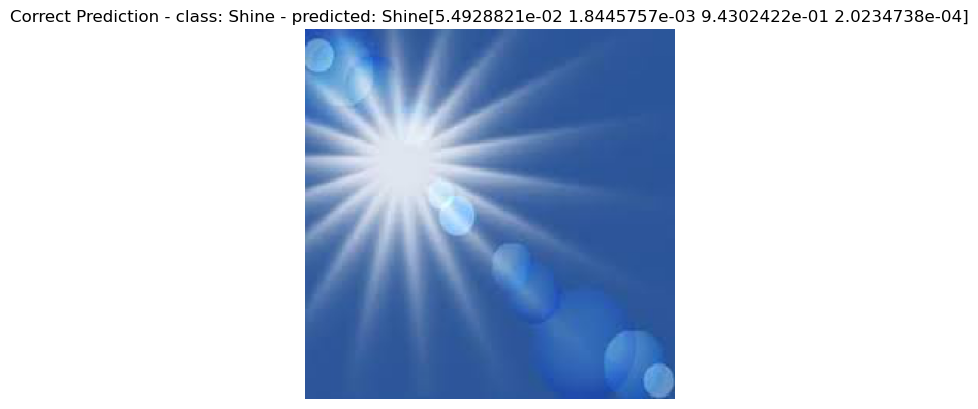

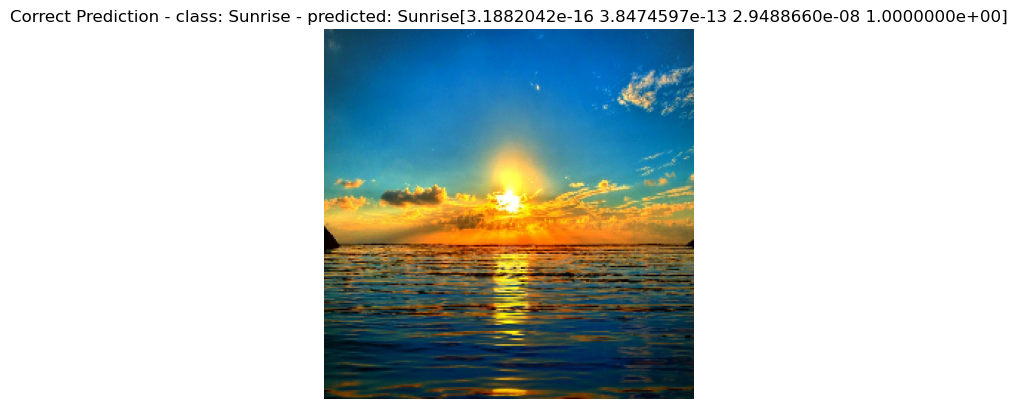

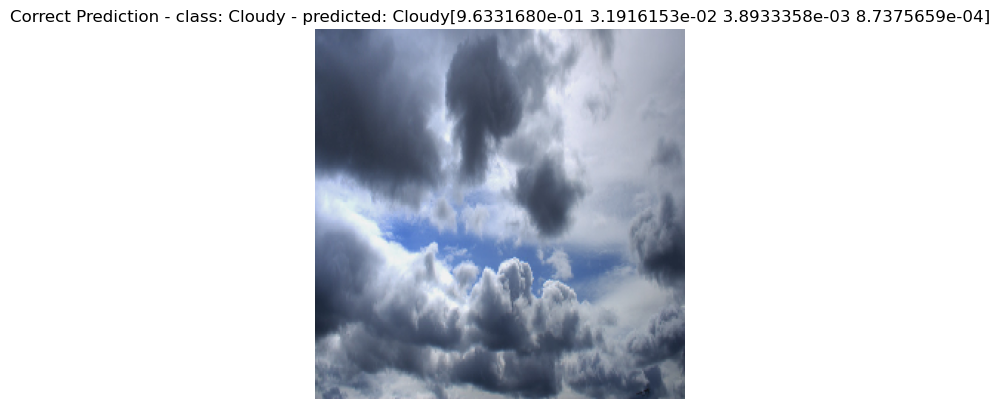

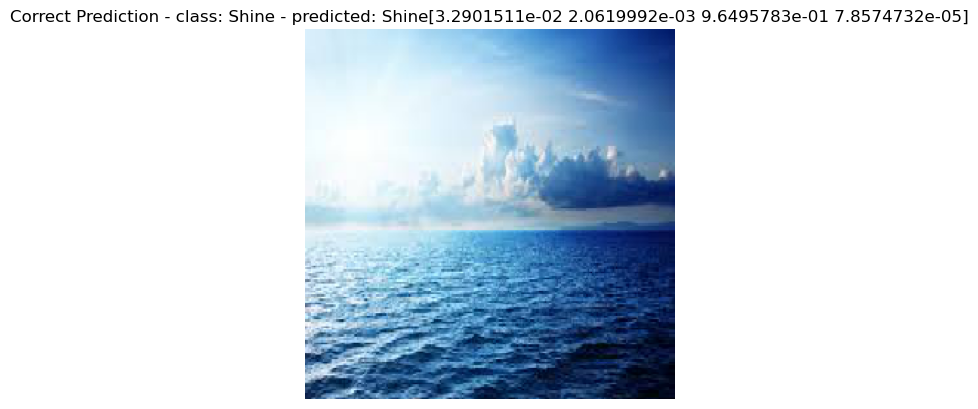

In [15]:
predict_one(model, 5) 